In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
# be sure to correct any csv column names to the same as the other csv file

In [2]:
cdfx = pd.read_csv("./catapult_mergesort_latency.csv", index_col=0)
vdfx = pd.read_csv("./catapult_mergesort_area.csv", index_col=0)
cdfx['throughput'] = cdfx['obj1'].min()*1/cdfx['obj1']
vdfx['throughput'] = cdfx['obj1'].min()*1/vdfx['obj1']
cdfx['ff_inv'] = 1/cdfx['ff']
vdfx['ff_inv'] = 1/vdfx['ff']
cdfx['lut_inv'] = 1/cdfx['lut']
vdfx['lut_inv'] = 1/vdfx['lut']
cdfx['1/obj2'] = cdfx['obj2'].min()*1/cdfx['obj2']
vdfx['1/obj2'] = cdfx['obj2'].min()*1/vdfx['obj2']
cdfx['clbUtil'] = cdfx['obj2']/147780
vdfx['clbUtil'] = vdfx['obj2']/147780
cdfx['mem_partition_size'] = cdfx['knob_partition_factor']
vdfx['mem_partition_size'] = vdfx['knob_partition_factor']
# drop columns
cdfx = cdfx.drop(columns=['knob_I_B'])
cdfx = cdfx.drop(columns=['knob_partition_factor'])
vdfx = vdfx.drop(columns=['knob_I_B'])
vdfx = vdfx.drop(columns=['knob_partition_factor'])

In [3]:
print(cdfx.count())
cdfx.head()

knob_no_size          11440
knob_outer_unroll     11440
knob_inner_unroll1    11440
knob_inner_unroll2    11440
knob_merge_unroll     11440
obj1                  11440
obj2                  11440
lut                   11440
ff                    11440
dsp                   11440
bram                  11440
throughput            11440
ff_inv                11440
lut_inv               11440
1/obj2                11440
clbUtil               11440
mem_partition_size    11440
dtype: int64


,knob_no_size,knob_outer_unroll,knob_inner_unroll1,knob_inner_unroll2,knob_merge_unroll,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil,mem_partition_size
n,,,,,,,,,,,,,,,,,
0,16,1,1,1,1,0.000017,231,1269,792,0,0,0.588235,0.001263,0.000788,0.961039,0.001563,1
1,16,1,1,1,1,0.000016,401,2092,1314,0,0,0.625000,0.000761,0.000478,0.553616,0.002713,2
2,16,1,1,1,1,0.000016,444,2748,1351,0,0,0.625000,0.000740,0.000364,0.500000,0.003004,4
3,16,1,1,1,1,0.000016,451,2940,1512,0,0,0.625000,0.000661,0.000340,0.492239,0.003052,8
4,16,1,1,1,1,0.000012,318,1845,1214,0,0,0.833333,0.000824,0.000542,0.698113,0.002152,16


In [4]:
print(vdfx.count())
vdfx.head()

knob_no_size          11447
knob_outer_unroll     11447
knob_inner_unroll1    11447
knob_inner_unroll2    11447
knob_merge_unroll     11447
obj1                  11447
obj2                  11447
lut                   11447
ff                    11447
dsp                   11447
bram                  11447
throughput            11447
ff_inv                11447
lut_inv               11447
1/obj2                11447
clbUtil               11447
mem_partition_size    11447
dtype: int64


,knob_no_size,knob_outer_unroll,knob_inner_unroll1,knob_inner_unroll2,knob_merge_unroll,obj1,obj2,lut,ff,dsp,bram,throughput,ff_inv,lut_inv,1/obj2,clbUtil,mem_partition_size
n,,,,,,,,,,,,,,,,,
0,16,1,1,1,1,0.000017,231,1269,792,0,0,0.588235,0.001263,0.000788,0.961039,0.001563,1
1,16,1,1,1,1,0.000016,401,2092,1314,0,0,0.625000,0.000761,0.000478,0.553616,0.002713,2
2,16,1,1,1,1,0.000016,444,2748,1351,0,0,0.625000,0.000740,0.000364,0.500000,0.003004,4
3,16,1,1,1,1,0.000016,451,2940,1512,0,0,0.625000,0.000661,0.000340,0.492239,0.003052,8
4,16,1,1,1,1,0.000012,318,1845,1214,0,0,0.833333,0.000824,0.000542,0.698113,0.002152,16


In [5]:
cmn_col = np.intersect1d(cdfx.columns, vdfx.columns)

Text(0.5, 1.0, 'Mergesort')

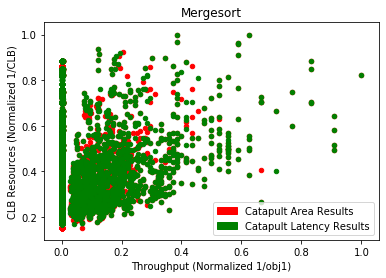

In [6]:
ax1 = vdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='r')
ax = cdfx.plot(x='throughput', y='1/obj2', kind='scatter', c='g', ax=ax1)
#ax1.set_ylim(0,0.016)

red_data = mpatches.Patch(color='red', label='Catapult Area Results')
green_data = mpatches.Patch(color='green', label='Catapult Latency Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Throughput (Normalized 1/obj1)')
plt.ylabel('CLB Resources (Normalized 1/CLB)')
plt.title("Mergesort")

Text(0, 0.5, 'Normalized 1/CLB (1/obj2)')

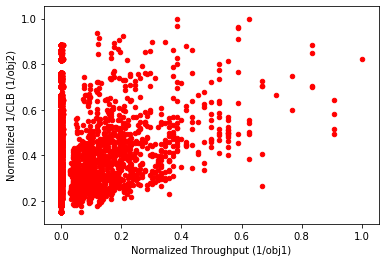

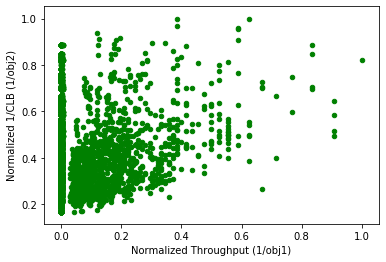

In [7]:
ax1 = vdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='r')
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
ax = cdfx.plot(y='1/obj2', x='throughput', kind='scatter', c='g')
#ax1.set_ylim(0,0.001)
#ax1.set_xlim(0,1)
#ax.set_ylim(0.2, 0.6)
#ax.set_xlim(0,0.0000004)
#red_data = mpatches.Patch(color='green', label='Vivado Results')
#green_data = mpatches.Patch(color='red', label='Catapult Results')
#plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')

In [8]:
print("~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~\n")
print(cdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")
print("\n~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~\n")
print(vdfx.mean())
print("~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~")

~~~~~~~~~~~ Catapult Averages ~~~~~~~~~~~~

knob_no_size          2777.986014
knob_outer_unroll        2.499650
knob_inner_unroll1       2.497028
knob_inner_unroll2       2.497028
knob_merge_unroll        2.501748
obj1                     4.156578
obj2                   667.191171
lut                   4093.307343
ff                    1401.404633
dsp                      0.000000
bram                     0.000000
throughput               0.019886
ff_inv                   0.000724
lut_inv                  0.000284
1/obj2                   0.383691
clbUtil                  0.004515
mem_partition_size     693.790734
dtype: float64
~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~

~~~~~~~~~~~ Vivado Averages ~~~~~~~~~~~~

knob_no_size          2777.083952
knob_outer_unroll        2.498209
knob_inner_unroll1       2.498559
knob_inner_unroll2       2.495326
knob_merge_unroll        2.501092
obj1                     4.158579
obj2                   666.056609
lut                   4081.729798
ff   

In [9]:
cdfx = cdfx.reset_index(drop=True)
vdfx = vdfx.reset_index(drop=True)
cv_df = pd.merge(cdfx, vdfx, on=['knob_no_size','knob_outer_unroll','knob_inner_unroll1','knob_inner_unroll2','knob_merge_unroll','mem_partition_size'], how='inner')
cv_df.count()

knob_no_size          11368
knob_outer_unroll     11368
knob_inner_unroll1    11368
knob_inner_unroll2    11368
knob_merge_unroll     11368
obj1_x                11368
obj2_x                11368
lut_x                 11368
ff_x                  11368
dsp_x                 11368
bram_x                11368
throughput_x          11368
ff_inv_x              11368
lut_inv_x             11368
1/obj2_x              11368
clbUtil_x             11368
mem_partition_size    11368
obj1_y                11368
obj2_y                11368
lut_y                 11368
ff_y                  11368
dsp_y                 11368
bram_y                11368
throughput_y          11368
ff_inv_y              11368
lut_inv_y             11368
1/obj2_y              11368
clbUtil_y             11368
dtype: int64

(0, 1)

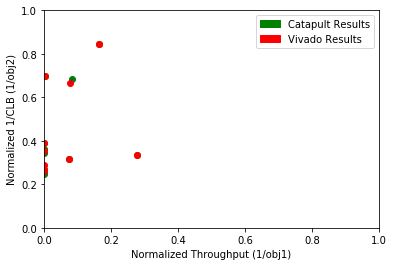

In [10]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample['1/obj2_x'], x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample['1/obj2_y'], x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['1/obj2_x'], row['1/obj2_y']],'b:',linewidth=0.7)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput (1/obj1)')
plt.ylabel('Normalized 1/CLB (1/obj2)')
plt.ylim(0, 1)
plt.xlim(0, 1)

(0, 0.003)

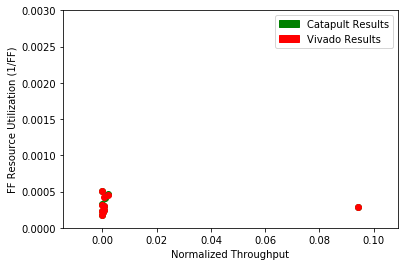

In [11]:
df_sample = cv_df.sample(10)
plt.scatter(y=df_sample.lut_inv_x, x=df_sample.throughput_x, c='g')
plt.scatter(y=df_sample.lut_inv_y, x=df_sample.throughput_y, c='r')
linex = []
for index, row in df_sample.iterrows():
    plt.plot([row['throughput_x'], row['throughput_y']], [row['lut_inv_x'], row['lut_inv_y']],'b:',linewidth=0.3)

red_data = mpatches.Patch(color='green', label='Catapult Results')
green_data = mpatches.Patch(color='red', label='Vivado Results')
plt.legend(handles=[red_data, green_data])
plt.xlabel('Normalized Throughput')
plt.ylabel('FF Resource Utilization (1/FF)')
plt.ylim(0, 0.003)

In [12]:
df_sample = cv_df.sample(30)